In [1]:
from PIL import Image, ImageDraw

import toyplot.font
import toyplot.text

import IPython.display

import xml.etree.ElementTree as xml
import sys
import logging
logging.basicConfig(level=logging.DEBUG)
toyplot.log.setLevel(logging.DEBUG)

In [2]:
text = """This is <i>italic</i>, <b>bold</b>,<br/><code>monospace</code>, <small>small</small>, <span style="font-size:24px">large</span>,<br/><sup>superscript</sup> and <sub>subscript</sub> text<br/>for your <span style="fill:red">amusement!</span>"""
#text = """<span style="alignment-baseline:hanging">Hanging</span><span style="alignment-baseline:central">Central</span><span style="alignment-baseline:middle">Middle</span><span style="alignment-baseline:alphabetic">Alpha</span>"""
#text = """Hello, <small>World!</small>"""
style = {"font-family":"helvetica", "font-size":"16px"}
fonts = toyplot.font.ReportlabLibrary()

layout = toyplot.text.layout(text=text, style=style, fonts=fonts)

In [3]:
toyplot.text.dump(layout)

toyplot.text.Layout
  height: 86.4
  width: 191.8544

  toyplot.text.LineBox
    ascent: 9.6672
    baseline: 0.0
    descent: -9.5328
    height: 19.2
    left: -64.896
    right: 64.896
    width: 129.792

    toyplot.text.TextBox
      ascent: 9.6672
      baseline: 4.0208
      descent: -9.5328
      left: -64.896
      right: -14.224
      style:
        font-size: 16.0
        vertical-align: baseline
        white-space: pre
        font-family: helvetica
        line-height: 19.2
      text: 'This is '
      width: 50.672

    toyplot.text.TextBox
      ascent: 9.6672
      baseline: 4.0208
      descent: -9.5328
      left: -14.224
      right: 17.776
      style:
        font-size: 16.0
        vertical-align: baseline
        line-height: 19.2
        white-space: pre
        font-family: helvetica
        font-style: italic
      text: 'italic'
      width: 32.0

    toyplot.text.TextBox
      ascent: 9.6672
      baseline: 4.0208
      descent: -9.5328
      left: 17.776
 

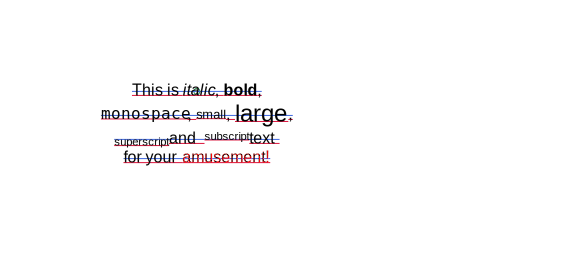

In [4]:
def draw(layout, show_anchor=True, show_line_baseline=True, show_text_baseline=True):
    svg = xml.Element(
        "svg",
        width=str(int(layout.width*3)),
        height=str(int(layout.height*3)),
        style="border: 1px solid #f0f0f0",
    )
    group = xml.SubElement(
        svg,
        "g",
        transform="translate(%s %s)" % (layout.width + 5, layout.height + 5),
    )

    if show_anchor:
        xml.SubElement(
            group,
            "circle",
            cx="0",
            cy="0",
            r="3",
            fill="none",
            stroke="seagreen",
        )

    for line in layout.children:
        if show_line_baseline:
            xml.SubElement(
                group,
                "line",
                x1=str(line.left),
                y1=str(line.baseline),
                x2=str(line.right),
                y2=str(line.baseline),
                stroke="royalblue")

        for box in line.children:
            if isinstance(box, toyplot.text.TextBox):
                if show_text_baseline:
                    xml.SubElement(
                        group,
                        "line",
                        x1=str(box.left),
                        y1=str(box.baseline),
                        x2=str(box.right),
                        y2=str(box.baseline),
                        stroke="crimson")

                xml.SubElement(
                    group,
                    "text",
                    x=str(box.left),
                    y=str(box.baseline),
                    style=toyplot.style.to_css(box.style),
                ).text = box.text

    return svg

IPython.display.SVG(xml.tostring(draw(layout)))